In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


# Welcome to a full guide on Logistic Regression🤩✨

## This is the second guide and if you wish to check out the first one which was about Linear Regression, do click [here](https://www.kaggle.com/code/kimmik123/all-about-linear-regression?scriptVersionId=91849813) to read about it! 

#### I'm sure we all heard of Logistic Regression too and many of us just starting out are surely confused about Linear and Logistic Regression. 
#### Both have the word regression in them but are very different yet slightly similiar algorithms 😂
#### In this guide, I'm going to tell you guys about the concept and purpose for Logistic Regression, how the model is trained (both concept and mathematical knowledge), and finally show you guys what it looks like to implement this from scratch so that you guys can observe the inner workings of the model

## Now, let's see what happens behind the scenes when we type in model.fit()
## Let's dive in!

<div style="width:100%;text-align: center;"> <img align=middle src="https://images.unsplash.com/photo-1495756650324-e45118cb3e35?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8ZGl2ZSUyMGlufGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=500&q=60" style="width:50%;height:50%;margin:auto;"> </div>
<h5><center>Image from <a href="https://unsplash.com/s/photos/dive-in">unsplash</a></center></h5>

# 1. Introduction

#### One of the most asked questions from people when it comes to Logistic Regression would probably be "Wait, it's not the same as linear regression?!"
#### Honestly I had the same confusion when I first started out so I don't anyone who is confused :)

#### Yes, they are very different algorithms and serve very different purposes.
#### Logistic Regression is known as a classification algorithm. 

#### Linear Regression attempts to predict a continuous value from linear combination of features which may possibly output infinite solutions.
#### On the other hand, the whole point of Logistic Regression is to output 2 discrete values, hence a classification algorithm.

# 2. Basic Concept

#### Now that you're acquainted with the rough idea of Logistic Regression, some of you might be asking...

<h1><center><i>"Then what's up with the Regression?"</i></center></h1>

### Exactly!
#### What does Regression mean in this scenario?

#### Well, this model still outputs a continuous value; a probability for being in a certain class, thus being called a Regression.
#### However, as I have mentioned above, Logistic Regression is meant to output 2 **discrete** values.
### So, how does that magic happen?

#### This is where the **Sigmoid Function** kicks in.

#### Allow me to explain what this does in 'English' before I surprise you with the math. 
#### This function is a special function, in the sense that the function restricts the output to a range of [0,1].
#### You might be wondering...

<h1><center><i>"What's so special about that?"</i></center></h1>

#### That is because as I've mentioned above, Logistic Regression is trying to output a probability for being in a certain class and we all know that probabilities lie in the region of [0,1]. That is true.. at least on Earth! 
#### I believe if you take a look at the graph, you would be very convinced with this fact.

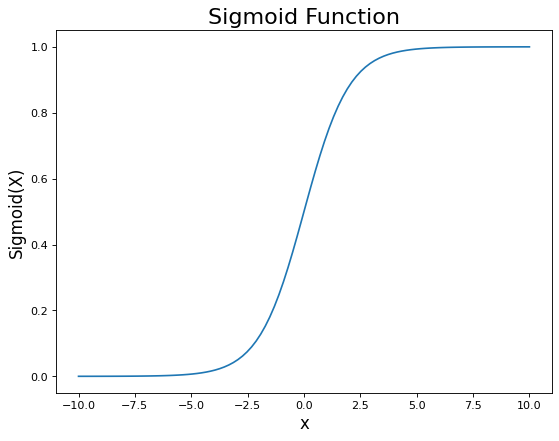

In [2]:
# Import matplotlib, numpy and math
from matplotlib.pyplot import figure
import math
  
figure(figsize=(8, 6), dpi=80)

x = np.linspace(-10, 10, 100)
z = 1/(1 + np.exp(-x))
  
plt.plot(x, z)
plt.xlabel("x", fontsize=15)
plt.ylabel("Sigmoid(X)", fontsize=15)
plt.title("Sigmoid Function", fontsize=20)
  
plt.show()

#### I'm sure you're convined that the outputs lie in the region of [0,1].
#### Now that you're convinced, allow me to present you the equation of this beautiful function.

$$\LARGE f(x) =  \frac{\mathrm{1} }{\mathrm{1} + e^{-z} } $$

#### where $$\large z = w_0 + w_1x_1 + ... +  w_nx_n$$

#### Now with this equation, we would be able to input all our feature variables and obtain a probability as to which class it belongs to and ultimately Logistic Regression would be able to predict which class that specific row/datapoint belongs to.

#### Obviously it's all not that easy. 
#### As with all other models, we would need to train this model.

# 3. Training

#### So how do we train these models?
#### In machine/deep learning, models learn by attempting to minimize a cost function.
#### You can understand by thinking that the model is training by trying to reduce the error it makes on the given dataset

#### But what is this cost function that Logistic Regression uses you might be wondering. 
#### For Logistic Regression, we use the **Log Log Function**.

$$\LARGE -\frac{1}{m} \sum\limits_{i=1}^n [{(y_i\log(p_i) + (1 - y_i)\log(1 - p_i)}] $$

where $$\large p_i = \frac{\mathrm{1} }{\mathrm{1} + e^{-(w_0 + w_1x_{i1} + ... +  w_nx_{in})} } $$

#### Now, this equation looks very daunting and confusing initially, especially if you happen to dislike mathematical symbols
#### However, allow me to explain to you what this beautiful equation states, by using two graphs below

Text(0.5, 1.0, 'When y=0')

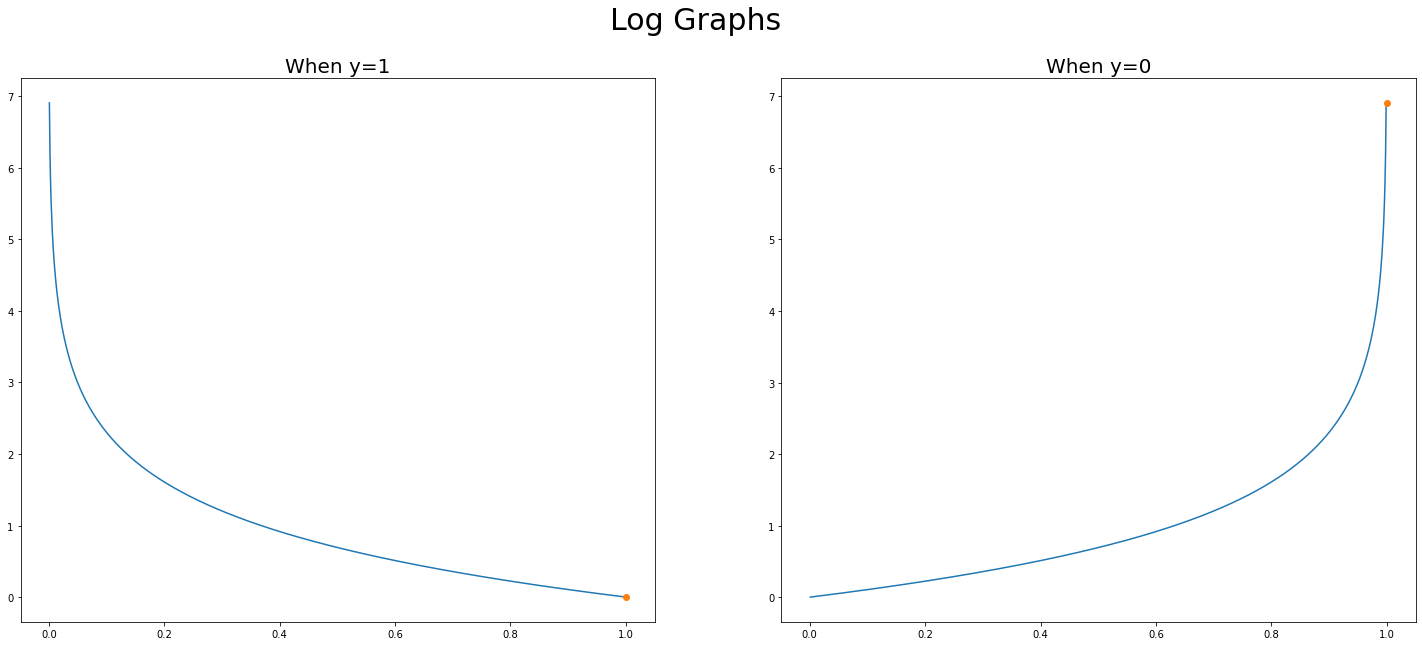

In [3]:
x = np.arange(0.001,1, 0.001).tolist()
ones = [1]*len(x)
y_1 = -np.log(x)
y_2 = -np.log(np.array(ones)-np.array(x))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,10))

fig.suptitle('Log Graphs', fontsize=30)

ax1.plot(x, y_1)
ax1.plot(1, -np.log(1), marker="o")
ax1.set_title('When y=1', fontsize=20)

ax2.plot(x, y_2)
ax2.plot(1, -np.log(0.001), marker="o")
ax2.set_title('When y=0', fontsize=20)

#### As you can see, the left graph is the graph of -log(x) and this only happens when the y value is 1.
#### When y = 1, the right side of the equation which is -log(1-x) becomes 0 and can be ignored, thus leaving only the left graph. 
#### As we can see from the left equation, when x = 1, the corresponding error value is 0 
#### **What this tells us is that when x=1 and y=1 (which is the perfect/correct prediction), the error value is the smallest it can be, 0.**

#### Let us say that the y=0 and lets look at the right graph. 
#### **If the corresponding value x = 1, which means the value of x is totally incorrect, the error value would be extremely high, almost infinity.**

#### Now, do you see what is happening in the equation? 
#### The equation serves the purpose of harshly penalizing incorrect predictions and minimally penalizing near-correct predictions.
#### Furthermore, the degree of punishment differs relative to how inaccurate or accurate the predictions were.

### Now that you've understood the cost function, as you should be wondering right now, how should we go about optimizing this highly complex structured cost function?

# 4. Optimization

#### The answer is...

<h1><center><i>Gradient Descent!</i></center></h1>

#### Now, I won't be going into the proof and the details of gradient descent such as why we want to be moving in the opposite direction of partial derivatives and so on.
#### If you wish to understand the algorithm more thorougly, please feel free to check out my [previous post](https://www.kaggle.com/code/kimmik123/all-about-linear-regression) where I painstakingly explained all the details and math behind Gradient Descent.

#### However, I would be explaining how Gradient Descent is applied to Logistic Regression in order to minimize our cost function explained above.

#### Now, let us bring back our cost function, all integrated together, and label it as E. 

$$\LARGE E = -\frac{1}{m} \sum\limits_{i=1}^n [{(y_i\log(\frac{\mathrm{1} }{\mathrm{1} + e^{-(w_0 + w_1x_{i1} + ... +  w_nx_{in})} }) + (1 - y_i)\log(1 - \frac{\mathrm{1} }{\mathrm{1} + e^{-(w_0 + w_1x_{i1} + ... +  w_nx_{in})} })}] $$

#### Now with Gradient Descent, we want to find the **partial derivatives** of E with respect to all the weights ($\large w_i $). 
#### This is so that we can iteratively drop down in the direction of the steepest descent of our cost function to keep decreasing our cost value.

#### Let us express the partial derivatives as such for simplicity.

$$\LARGE\frac{\partial E}{\partial w_j} $$

#### Now comes the **chain rule** and I'm sure you have heard about this rule in one of your calculus classes. 
#### If you are unfamiliar with this rule, feel free to check out this [page](https://www.khanacademy.org/math/ap-calculus-ab/ab-differentiation-2-new/ab-3-1a/a/chain-rule-review) to gain a better understanding. 

#### Now using the chain rule, we can express the partial derivative as such.

$$\LARGE \frac{\partial E}{\partial w_j}  = \frac{\partial E}{\partial p} \cdot \frac{\partial p}{\partial z} \cdot \frac{\partial z}{\partial w_j}$$

#### where $$\large z = w_0 + w_1x_{i1} + ... +  w_nx_{in} $$

#### Now that looks way cleaner, doesn't it?
#### Now all we have left is to calculate the 3 different partial derivatives.
### Let's dive in!

$$\LARGE E = -\frac{1}{m} \sum\limits_{i=1}^n [{(y_i\log(p_i) + (1 - y_i)\log(1 - p_i)}] \\ 
\LARGE \frac{\partial E}{\partial p} = -\frac{1}{m} \sum\limits_{i=1}^n (\frac {y_i}{p_i} - \frac{1-y_i}{1-p_i})
$$

#### That's one down!
#### Let's move on the second one.

$$\LARGE p_i = \frac{\mathrm{1} }{\mathrm{1} + e^{-z}} \\
\LARGE \frac{\partial p_i}{\partial z} = (1+e^{-z})^{-2} \times (e^{-z}) \\ 
\LARGE = \frac {e^{-z}} {(1+e^{-z})^{2}} \\
\LARGE = \frac {1}{1+e^{-z}} \times \frac {e^{-z}} {1+e^{-z}} \\
\LARGE = \frac {1}{1+e^{-z}} \times (\frac {1+e^{-z}} {1+e^{-z}} - \frac {1}{1+e^{-z}}) \\
\LARGE = p_i \times (1-p_i)
$$

#### That's it!
#### Finally, one more to go.

$$\LARGE z = w_0 + w_1x_{i1} + ... +  w_nx_{in} \\ 
\LARGE \frac{\partial z}{\partial w_j} = x_{ij}
$$

#### There they all are! 
#### Now, all we need to do is multiply all of them sensibly.
#### Let's hope we don't get anything wrong 🤯

$$\LARGE \frac{\partial E}{\partial w_j}  = -\frac{1}{m} \sum\limits_{i=1}^n (\frac {y_i}{p_i} - \frac{1-y_i}{1-p_i}) \cdot (p_i \times (1-p_i)) \cdot x_{ij} \\
\LARGE = \frac{1}{m} \sum\limits_{i=1}^n ((y_i-p_i) \cdot x_{ij})$$

#### Finally, we got the partial derivative!
#### Now with this equation, we would need to deduct it from existing weights to travel down the steepest descent to minimize the cost function.

$$\LARGE w_j = w_j - LR(\frac{1}{m} \sum\limits_{i=1}^n ((y_i-p_i) \cdot x_{ij})) $$

#### where $\large LR $ is the learning rate.

#### Now that I've shown you the mathematical steps and rigor this algorithm takes, allow me to show you how to code it from scratch

# 5. Code

#### I'll be using a dataset from Kaggle to predict 10 year risk of coronary heart disease in the form of yes or no.
#### As you can tell, this can be tackled by using Logistic Regression. 
#### First, I will use the most approachable form of machine learning, sklearn.

In [4]:
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('../input/heart-disease-prediction-using-logistic-regression/framingham.csv')
df.fillna(df.mean(), inplace=True)
target = df.pop('TenYearCHD')
features = df

model = LogisticRegression(max_iter=5000).fit(features, target)
print("The model's accuracy is {}".format(model.score(features, target)))

The model's accuracy is 0.8563001415762151


#### As we can see, an accuracy of 85.6% is not too bad for a basline model.
#### I would love to visualize the results for you but this dataset exceeds humans' three dimensional reality so unless the movie Interstellar proves to be correct, I don't see a way to visualize this for you 😥

<div style="width:100%;text-align: center;"> <img align=middle src="https://i.pinimg.com/originals/38/cc/e8/38cce80092b92a776bdba82ad7f0c4ce.jpg" style="width:50%;height:50%;margin:auto;"> </div>
<h5><center>Image from <a href="https://www.pinterest.com/pin/498070040016357902/">
Pinterest</a></center></h5>

#### Now allow me to show you how to implement .fit() method from scratch using Gradient Descent.

In [5]:
import warnings
warnings.filterwarnings("ignore")

#simple functions
def predict(weights, features):
    temp = np.matmul(features, np.transpose(weights))
    result = 1/(1+np.exp(-temp))    
    
    return result 

def accuracy(acc):
    t = 0
    for value in acc:
        if value == True:
            t+=1
    acc = (t/len(acc))*100
    return(acc)
    
#------------------------------------#

# Random weights
weights = np.random.rand(1, 15).flatten()

# Hyperparameters
epochs = 10
lr = 1e-5

# Initial Performance
y_pred = predict(weights, features)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
acc = y_pred == target
accuracy_value = accuracy(acc)
print("The initial accuracy without any training is {}".format(accuracy_value))

# Training!
for epoch in range(epochs):
    y_pred = predict(weights, features) # prediction
    for (index,weight) in enumerate(weights):
        weights[index] = weight - lr * np.matmul(np.transpose(y_pred-target),features.iloc[:,index]) # partial derivative

# Setting a threshold
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
    
acc = y_pred == target

# Accuracy
accuracy_value = accuracy(acc)

print("The model's accuracy with Gradient Descent is {}".format(accuracy_value))

The initial accuracy without any training is 15.19584709768759
The model's accuracy with Gradient Descent is 84.80415290231241


#### As you can see, using Gradient Descent, we can obtain a similar accuracy of 84.8% which is pretty amazing for a model without any hyperparameter tuning and a few number of epochs.

# 6. Conclusion

#### If you have stuck by the guide till now, well done! 
#### It was really not easy, especially with all the derivatives you had to look at and the horrifying chain rule. 
#### Nonetheless, I hope you understood how Logistic Regression actually works under the hood and learn to appreciate the .fit() function way more.

#### As always, do feel free to check out my other works [here](https://www.kaggle.com/kimmik123/code) and if you found this useful, please do leave an upvote ✔, it goes a long way!

#### Do keep a lookout for more guides soon, and until then... Cheers!!! 🤩

# 7. Credit

* https://towardsdatascience.com/logistic-regression-from-scratch-69db4f587e17
* https://machinelearningmastery.com/implement-logistic-regression-stochastic-gradient-descent-scratch-python/
